<h1> Importing Packages <h1>

In [1]:
# Import libraries that will be used

import pandas as pd # Data processing
import numpy as np # Linear algebra
import matplotlib.pyplot as plt # Data plot
%matplotlib inline 
import seaborn as sns # Data plot

In [2]:
import warnings
warnings.filterwarnings("ignore") # Ignores warnings

<h1> Loading Data <h1>

In [4]:
date_columns=['date_activ','date_end','date_modif_prod','date_renewal']
df = pd.read_csv('./churn_data_modeling.csv',parse_dates=date_columns)

df.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

  date_activ   date_end date_modif_prod date_renewal  ...  \
0 2013-06-15 2016-06-15      2015-11-01   2015-06-23  ...   
1 2009-08-21 2016-08-30      2009-08-21   2015-08-31  ...   
2 2010-04-16 2016-04-16      2010-04-16   2015-04-17  ...   
3 2010-03-30 2016-03-30      2010-03-30   2015-03-31  ...   
4 2010-01-13 2016-03-07      2010-01-13   2015-03-09  ...   

   mean_year_price_off_peak_var  mean_year_price_peak_var  \
0                      0.131756                  0.092638   
1                      0.147600                  0.000000   
2                      0.167798                  0.088409   
3                      0.148586                  0.000000   
4                      0.119906                  0.101673   

   mean_year_price_mid_peak_var  mean_year_price_off_peak_fix  \
0                      0.036909                     42.497907   
1                      0.000000                     44.444710   
2                      0.000000                     44.444710   
3                      0.000000                     44.444710   
4                      0.073719                     40.728885   

   mean_year_price_peak_fix  mean_year_price_mid_peak_fix  \
0                 12.218665                      8.145777   
1                  0.000000                      0.000000   
2                  0.000000                      0.000000   
3                  0.000000                      0.000000   
4                 24.437330                     16.291555   

   mean_year_price_off_peak mean_year_price_peak  mean_year_price_med_peak  \
0                 42.629663            12.311304                  8.182687   
1                 44.592310             0.000000                  0.000000   
2                 44.612508             0.088409                  0.000000   
3                 44.593296             0.000000                  0.000000   
4                 40.848791            24.539003                 16.365274   

   churn  
0      1  
1      0  
2      0  
3      0  
4      0  

[5 rows x 54 columns]

Above shows PowerCo's churn data - whether the average customer will switch to another provider or not. 

Per task requirements, we will use a Random Forest classifier to predict PowerCo's customer churn and evaluate the performance our model with suitable metrics.

In [5]:
# Let's drop the 'Unamed: 0' column

df.drop(columns = 'Unnamed: 0', inplace=True)

In [6]:
# Checks shape of the dataset

df.shape

(14605, 53)

In [7]:
# Let's view datatypes within dataset

df.dtypes


id                                        object
channel_sales                             object
cons_12m                                   int64
cons_gas_12m                               int64
cons_last_month                            int64
date_activ                        datetime64[ns]
date_end                          datetime64[ns]
date_modif_prod                   datetime64[ns]
date_renewal                      datetime64[ns]
forecast_cons_12m                        float64
forecast_cons_year                         int64
forecast_discount_energy                 float64
forecast_meter_rent_12m                  float64
forecast_price_energy_off_peak           float64
forecast_price_energy_peak               float64
forecast_price_pow_off_peak              float64
has_gas                                   object
imp_cons                                 float64
margin_gross_pow_ele                     float64
margin_net_pow_ele                       float64
nb_prod_act         

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14605 entries, 0 to 14604
Data columns (total 53 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14605 non-null  object        
 1   channel_sales                   14605 non-null  object        
 2   cons_12m                        14605 non-null  int64         
 3   cons_gas_12m                    14605 non-null  int64         
 4   cons_last_month                 14605 non-null  int64         
 5   date_activ                      14605 non-null  datetime64[ns]
 6   date_end                        14605 non-null  datetime64[ns]
 7   date_modif_prod                 14605 non-null  datetime64[ns]
 8   date_renewal                    14605 non-null  datetime64[ns]
 9   forecast_cons_12m               14605 non-null  float64       
 10  forecast_cons_year              14605 non-null  int64         
 11  fo

<h1>Feature Engineering</h1>

We will find the difference between off-peak prices in December and preceding Januaary the previous year.

In [10]:
# Let's quickly tidy up price data dataset

price_data = pd.read_csv('price_data.csv')
price_data["price_date"] = pd.to_datetime(price_data["price_date"], format='%Y-%m-%d')

price_data.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [13]:
# Now, let's group off-peak prices by companies and month

monthly_price_by_id = price_data.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

In [14]:
# Let's get the January and December prices as this will be important moving forward

jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

In [15]:
# Now we  the difference

diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]

diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

In [16]:
# Double-check we are on the right track

monthly_price_by_id.head()

id price_date  price_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1  0002203ffbb812588b632b9e628cc38d 2015-02-01            0.126098   
2  0002203ffbb812588b632b9e628cc38d 2015-03-01            0.128067   
3  0002203ffbb812588b632b9e628cc38d 2015-04-01            0.128067   
4  0002203ffbb812588b632b9e628cc38d 2015-05-01            0.128067   

   price_off_peak_fix  
0           40.565969  
1           40.565969  
2           40.728885  
3           40.728885  
4           40.728885

In [18]:
# And here...

jan_prices.head()

id price_date  price_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1  0004351ebdd665e6ee664792efc4fd13 2015-01-01            0.148047   
2  0010bcc39e42b3c2131ed2ce55246e3c 2015-01-01            0.150837   
3  0010ee3855fdea87602a5b7aba8e42de 2015-01-01            0.123086   
4  00114d74e963e47177db89bc70108537 2015-01-01            0.149434   

   price_off_peak_fix  
0           40.565969  
1           44.266931  
2           44.444710  
3           40.565969  
4           44.266931

In [19]:
# Let's merge both into one DataFrame

df = pd.merge(df, diff, on='id')
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...  \
0      2015-11-01   2015-06-23               0.00  ...   
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   mean_year_price_mid_peak_var  mean_year_price_off_peak_fix  \
0                      0.036909                     42.497907   
1                      0.000000                     44.444710   
2                      0.000000                     44.444710   
3                      0.000000                     44.444710   
4                      0.073719                     40.728885   

   mean_year_price_peak_fix  mean_year_price_mid_peak_fix  \
0                 12.218665                      8.145777   
1                  0.000000                      0.000000   
2                  0.000000                      0.000000   
3                  0.000000                      0.000000   
4                 24.437330                     16.291555   

   mean_year_price_off_peak  mean_year_price_peak mean_year_price_med_peak  \
0                 42.629663             12.311304                 8.182687   
1                 44.592310              0.000000                 0.000000   
2                 44.612508              0.088409                 0.000000   
3                 44.593296              0.000000                 0.000000   
4                 40.848791             24.539003                16.365274   

   churn  offpeak_diff_dec_january_energy  offpeak_diff_dec_january_power  
0      1                         0.020057                        3.700961  
1      0                        -0.003767                        0.177779  
2      0                        -0.004670                        0.177779  
3      0                        -0.004547                        0.177779  
4      0                        -0.006192                        0.162916  

[5 rows x 55 columns]

Our datetime features:

- date_activ = date of activation of the contract
- date_end = registered date of the end of the contract
- date_modif_prod = date of the last modification of the product
- date_renewal = date of the next contract renewal

We can create new columns:

- tenure: the time customer uses service of PowerCo
- months_activ = Number of months active until reference date (Jan 2016)
- months_to_end = Number of months of the contract left until reference date (Jan 2016)
- months_modif_prod = Number of months since last modification until reference date (Jan 2016)
- months_renewal = Number of months since last renewal until reference date (Jan 2016)

In [20]:
# Since we no longer need the datetime columns so we can drop them

remove = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']

df = df.drop(columns=remove)
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  ...  mean_year_price_mid_peak_var  \
0                        0.114481  ...                      0.036909   
1                        0.145711  ...                      0.000000   
2                        0.165794  ...                      0.000000   
3                        0.146694  ...                      0.000000   
4                        0.116900  ...                      0.073719   

   mean_year_price_off_peak_fix mean_year_price_peak_fix  \
0                     42.497907                12.218665   
1                     44.444710                 0.000000   
2                     44.444710                 0.000000   
3                     44.444710                 0.000000   
4                     40.728885                24.437330   

   mean_year_price_mid_peak_fix  mean_year_price_off_peak  \
0                      8.145777                 42.629663   
1                      0.000000                 44.592310   
2                      0.000000                 44.612508   
3                      0.000000                 44.593296   
4                     16.291555                 40.848791   

   mean_year_price_peak  mean_year_price_med_peak  churn  \
0             12.311304                  8.182687      1   
1              0.000000                  0.000000      0   
2              0.088409                  0.000000      0   
3              0.000000                  0.000000      0   
4             24.539003                 16.365274      0   

   offpeak_diff_dec_january_energy offpeak_diff_dec_january_power  
0                         0.020057                       3.700961  
1                        -0.003767                       0.177779  
2                        -0.004670                       0.177779  
3                        -0.004547                       0.177779  
4                        -0.006192                       0.162916  

[5 rows x 51 columns]

<h1> Transforming Categorical Data </h1>

We will be working with 3 categorical variables:
- has_gas
- channel_sales
- origin_up


In [21]:
# For the column has_gas, replace t for 1 and f for 0

df['has_gas']=df['has_gas'].replace(['t','f'],[1,0])

In [22]:
# Let's check the values of the other 2 categorical variables

df['channel_sales'].value_counts()

foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: channel_sales, dtype: int64

In [23]:
df['origin_up'].value_counts()


lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: origin_up, dtype: int64

In [24]:
df = pd.get_dummies(df, columns = ['channel_sales', 'origin_up'])

df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  \
0                    0.098142  ...   
1                    0.000000  ...   
2                    0.087899  ...   
3                    0.000000  ...   
4                    0.100015  ...   

   channel_sales_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                               1   
1                                               0   
2                                               1   
3                                               0   
4                                               0   

   channel_sales_lmkebamcaaclubfxadlmueccxoimlema  \
0                                               0   
1                                               0   
2                                               0   
3                                               1   
4                                               0   

   channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   channel_sales_usilxuppasemubllopkaafesmlibmsdf  origin_up_MISSING  \
0                                               0                  0   
1                                               0                  0   
2                                               0                  0   
3                                               0                  0   
4                                               0                  0   

   origin_up_ewxeelcelemmiwuafmddpobolfuxioce  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  \
0                                           1   
1                                           0   
2                                           0   
3                                           0   
4        

In [31]:
# Let's remove the values with little to no occurence

# List of columns to drop
columns_to_drop = [
    'channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds',
    'channel_sales_epumfxlbckeskwekxbiuasklxalciiuu',
    'channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa',
    'origin_up_MISSING',
    'origin_up_usapbepcfoloekilkwsdiboslwaxobdp',
    'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'
]

# Iterate through the list of columns and drop them if they exist
for column in columns_to_drop:
    if column in df.columns:
        df = df.drop(columns=column)

# Verify the DataFrame after dropping
df.head()


id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  offpeak_diff_dec_january_energy  \
0                    0.098142  ...                         0.020057   
1                    0.000000  ...                        -0.003767   
2                    0.087899  ...                        -0.004670   
3                    0.000000  ...                        -0.004547   
4                    0.100015  ...                        -0.006192   

   offpeak_diff_dec_january_power  channel_sales_MISSING  \
0                        3.700961                      0   
1                        0.177779                      1   
2                        0.177779                      0   
3                        0.177779                      0   
4                        0.162916                      1   

   channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   channel_sales_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                               1   
1                                               0   
2                                               1   
3                                               0   
4                                               0   

   channel_sales_lmkebamcaaclubfxadlmueccxoimlema  \
0                                               0   
1                                               0   
2                                               0   
3                                               1   
4                                               0   

   channel_sales_usilxuppasemubllopkaafesmlibmsdf  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1       

<h1>Transforming Numerical Data</h1>

As you saw, the features on the previous EDA were highly skewed. This means we will need to transform the distribution to normal-life distribution.

We will use log transformation via NumPy by using the log() function on our desired column(s).

In [33]:
# Let's check the skewed features so we can compare before and atfer the transformation

numeric_features = df[[
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak'
]]
numeric_features.describe().T

count           mean            std  min  \
cons_12m                        14605.0  159230.267032  573483.629064  0.0   
cons_gas_12m                    14605.0   28091.082506  162978.563803  0.0   
cons_last_month                 14605.0   16091.371448   64366.262314  0.0   
forecast_cons_12m               14605.0    1868.638618    2387.651549  0.0   
forecast_cons_year              14605.0    1399.858747    3247.876793  0.0   
forecast_discount_energy        14605.0       0.966450       5.108355  0.0   
forecast_meter_rent_12m         14605.0      63.090448      66.166636  0.0   
forecast_price_energy_off_peak  14605.0       0.137282       0.024623  0.0   
forecast_price_energy_peak      14605.0       0.050488       0.049037  0.0   
forecast_price_pow_off_peak     14605.0      43.130085       4.486140  0.0   

                                        25%           50%           75%  \
cons_12m                        5674.000000  14116.000000  40764.000000   
cons_gas_12m                       0.000000      0.000000      0.000000   
cons_last_month                    0.000000    793.000000   3383.000000   
forecast_cons_12m                494.980000   1112.610000   2402.270000   
forecast_cons_year                 0.000000    314.000000   1746.000000   
forecast_discount_energy           0.000000      0.000000      0.000000   
forecast_meter_rent_12m           16.180000     18.800000    131.030000   
forecast_price_energy_off_peak     0.116340      0.143166      0.146348   
forecast_price_energy_peak         0.000000      0.084138      0.098837   
forecast_price_pow_off_peak       40.606701     44.311378     44.311378   

                                         max  
cons_12m                        6.207104e+06  
cons_gas_12m                    4.154590e+06  
cons_last_month                 7.712030e+05  
forecast_cons_12m               8.290283e+04  
forecast_cons_year              1.753750e+05  
forecast_discount_energy        3.000000e+01  
forecast_meter_rent_12m         5.993100e+02  
forecast_price_energy_off_peak  2.739630e-01  
forecast_price_energy_peak      1.959750e-01  
forecast_price_pow_off_peak     5.926638e+01

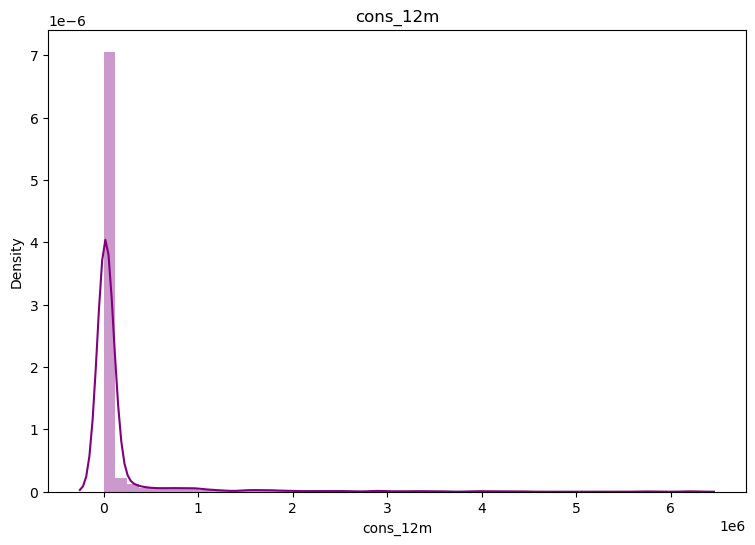

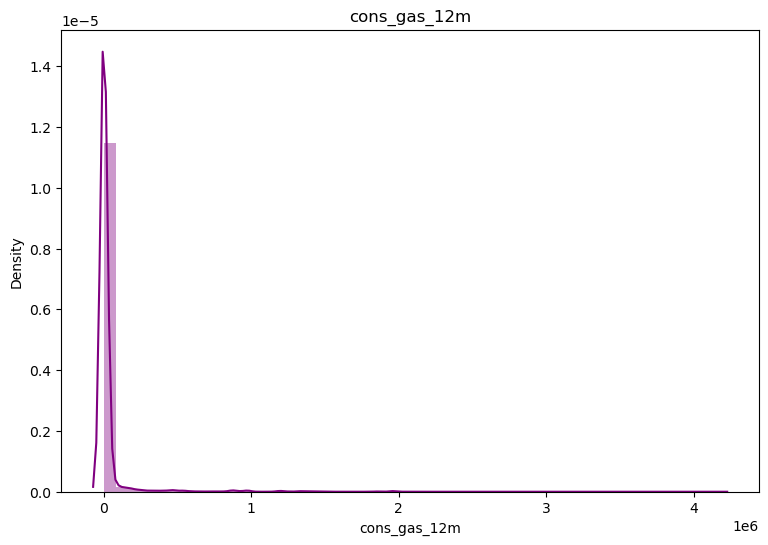

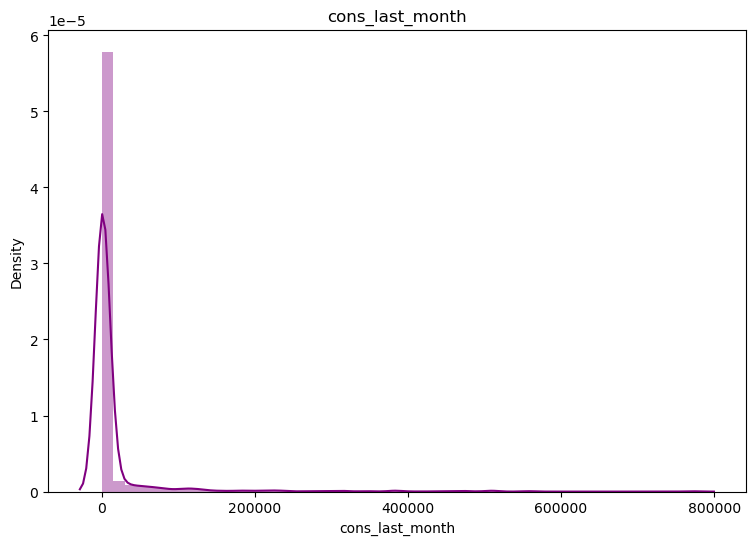

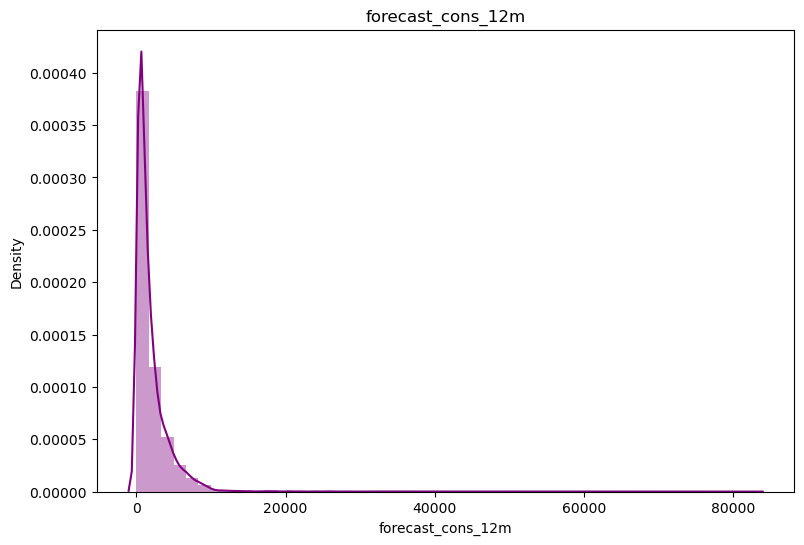

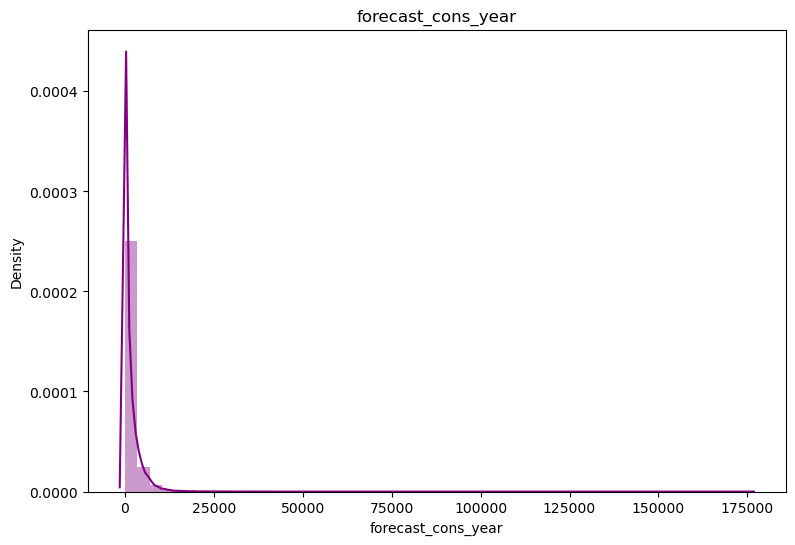

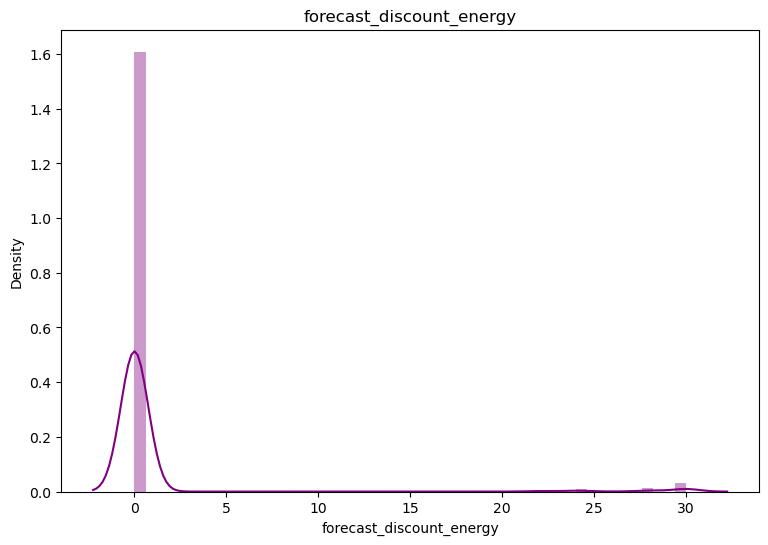

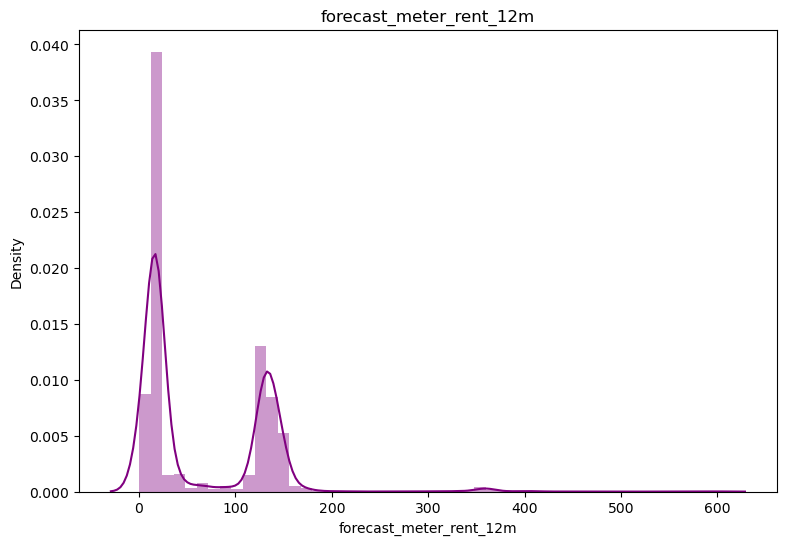

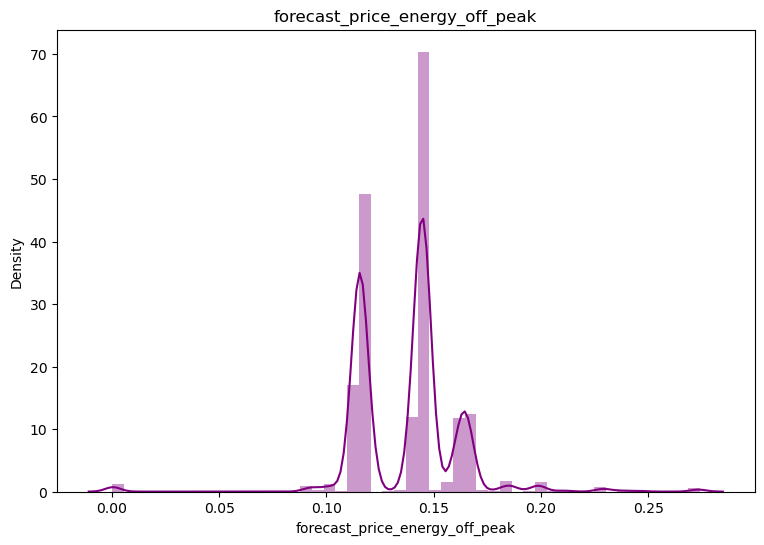

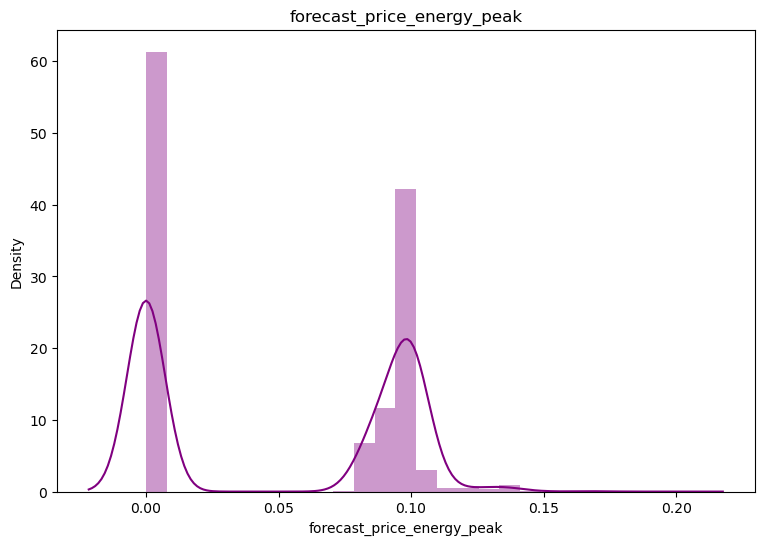

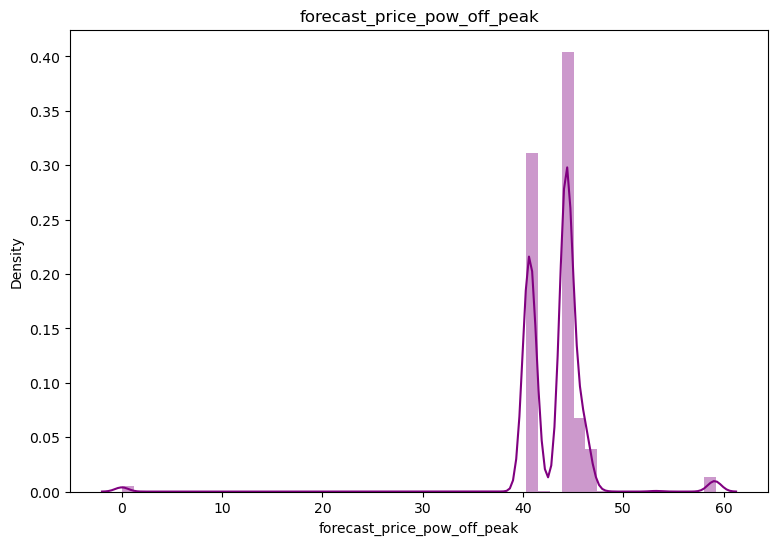

In [34]:
# Let's now plot a histogram for each numeric feature

for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    sns.distplot(feature, ax = ax, color="purple")
    ax.set_title(col)
    
plt.show()

By looking at the histograms, we can see the standard deviation for majority of the features are pretty high.

In [35]:
# Let's now use the log() function

for i in numeric_features:
    df[i]=df[i].apply(lambda x:np.log(1+x))

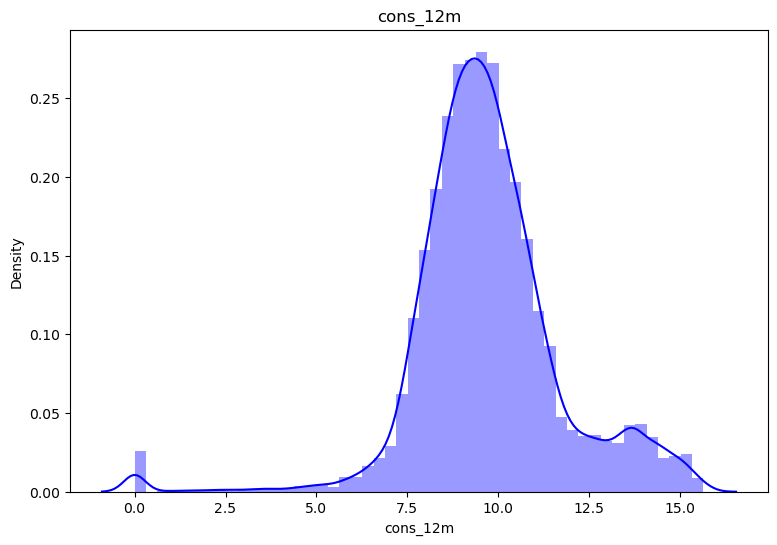

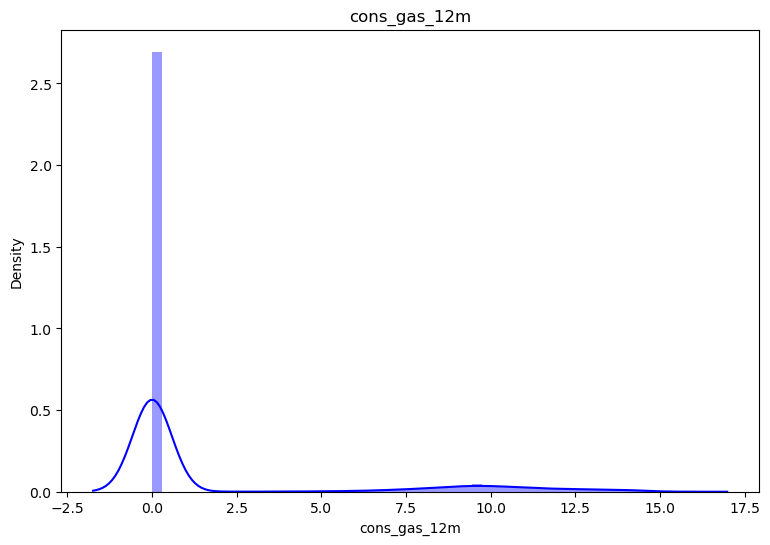

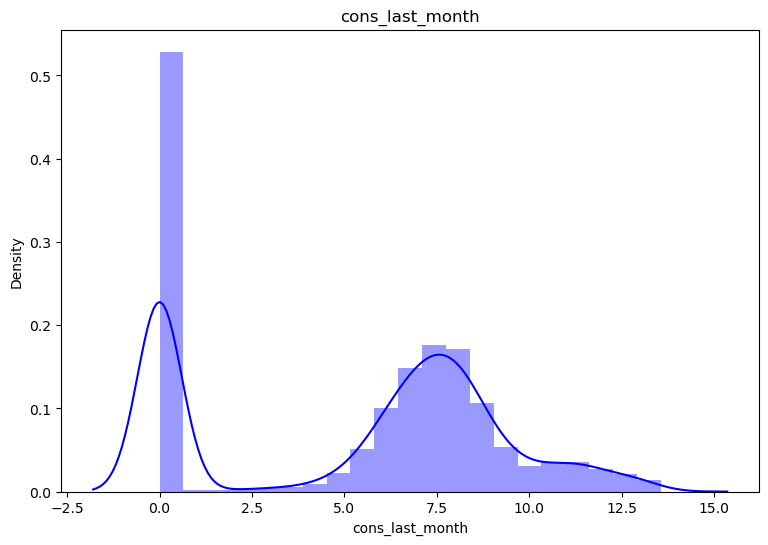

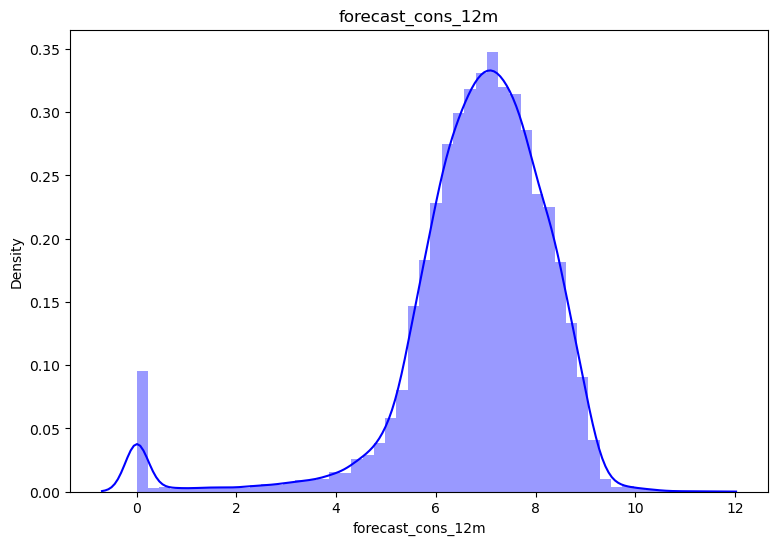

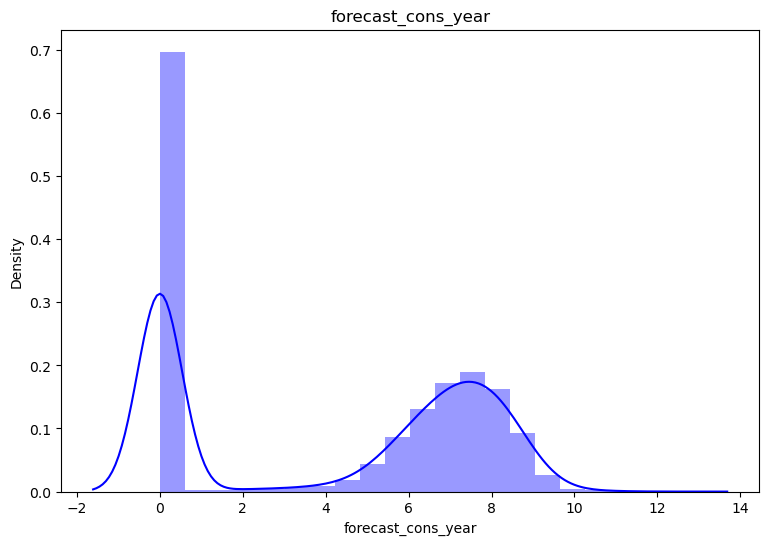

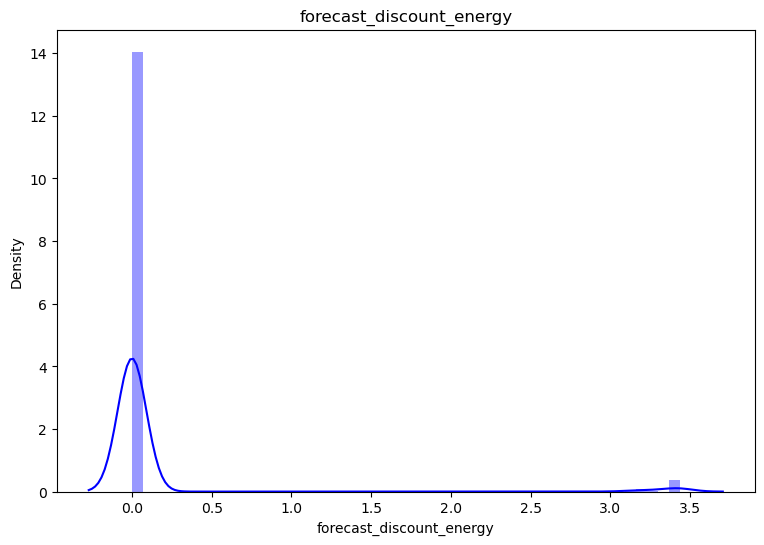

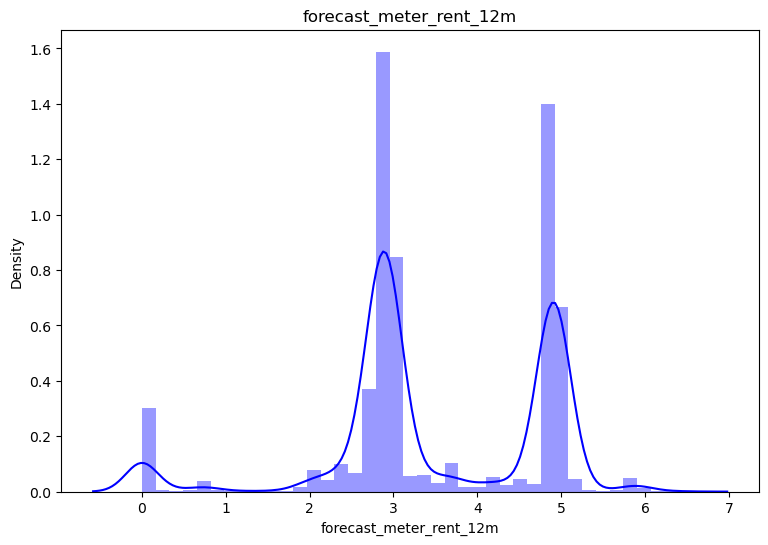

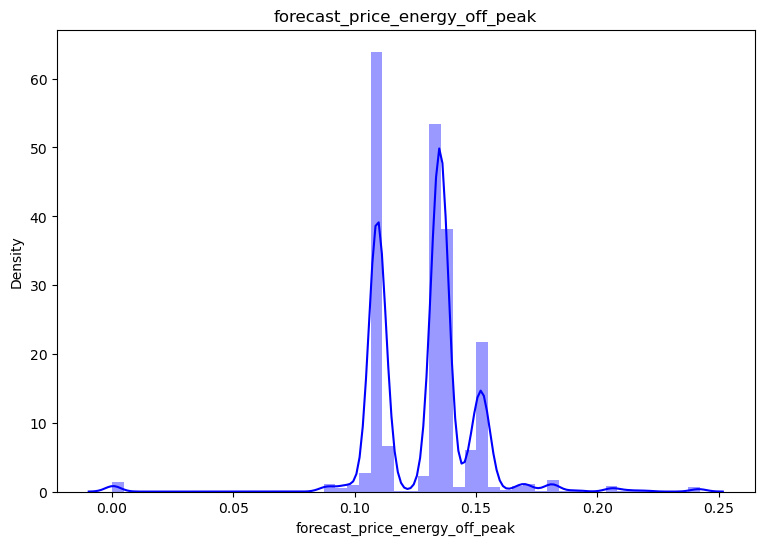

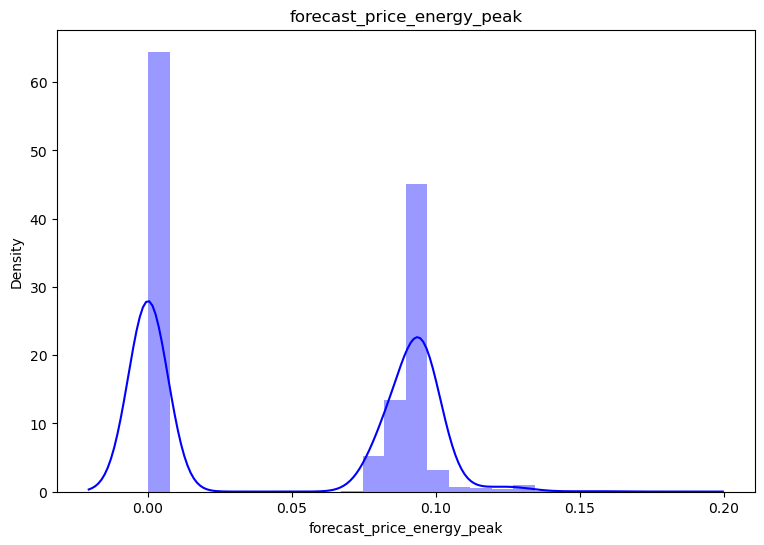

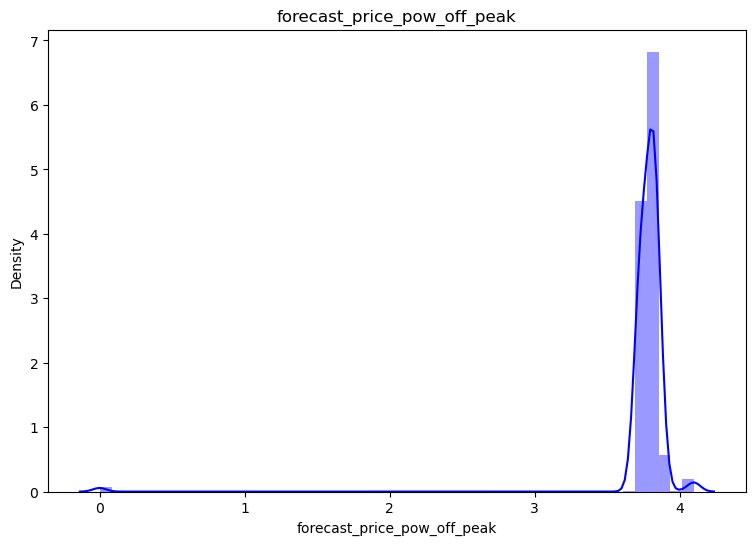

In [36]:
# Let's quickly check the distributions after log transformation.

# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    sns.distplot(feature, ax = ax, color="blue")
    ax.set_title(col)
    
plt.show()

<h1> Correlations</h1>

Ths will reveal the linear relationships between features.

We obviously want features to correlate with churn, as this will indicate that they are good predictors of it. 

Features with very high correlation may be suspicious because if very high correlation were found in 2 columns, they often share a lot of the same information.

Independent features must have no dependence on any other feature. If 2 features are high corelated AND share similar information, we remove them.

In [38]:
correlation = df.corr()


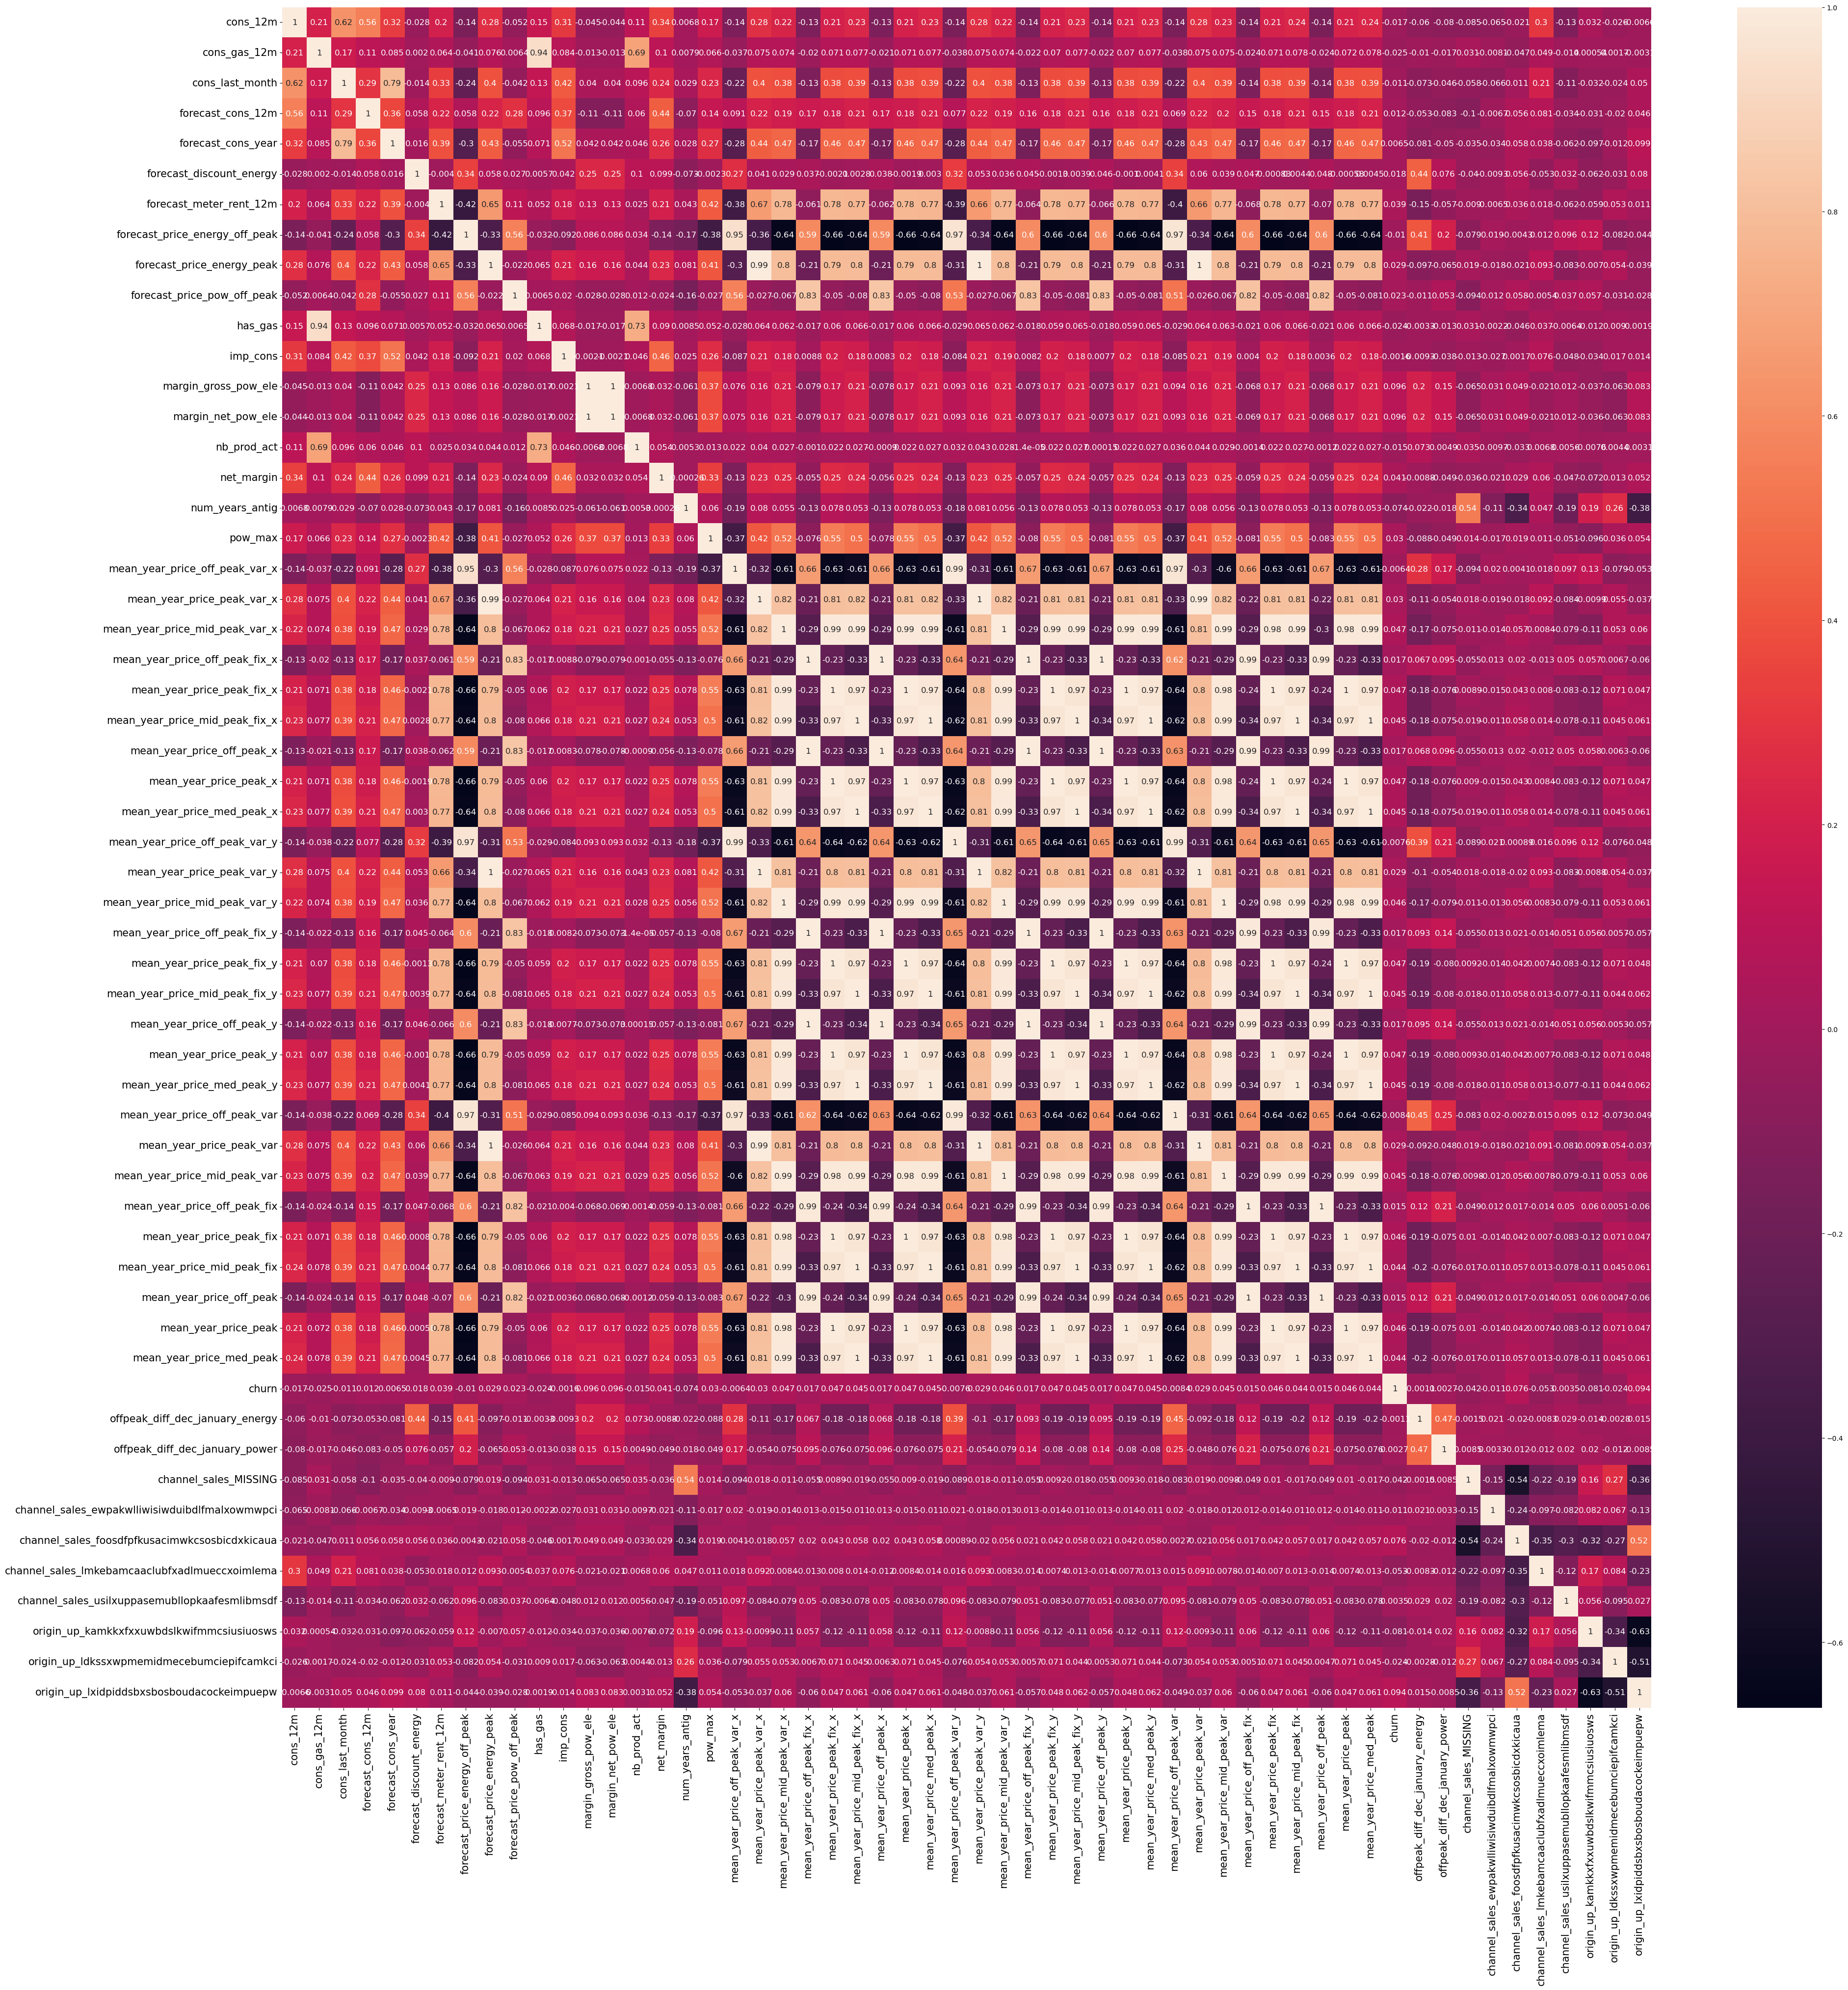

In [39]:
# Let's plot the correlation

plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12}
)

# Axis ticks size

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [41]:
# Let's remove the variables showing a high correlation w/ other independent features

# List of columns to drop
columns_to_drop = [
    'mean_year_price_mid_peak_var', 'mean_year_price_peak_fix', 'mean_year_price_mid_peak_fix',
    'mean_year_price_peak', 'mean_year_price_med_peak', 'mean_6m_price_mid_peak_var',
    'mean_6m_price_peak_fix', 'mean_6m_price_mid_peak_fix', 'mean_6m_price_peak',
    'mean_6m_price_med_peak', 'mean_3m_price_mid_peak_var', 'mean_3m_price_off_peak_fix',
    'mean_3m_price_peak_fix', 'mean_3m_price_mid_peak_fix', 'mean_3m_price_peak', 'mean_3m_price_med_peak'
]

# Filter the columns to drop based on their existence
columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop the selected columns
df = df.drop(columns=columns_to_drop)

# Verify the DataFrame after dropping
df.head()


id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000     10.914124         0.000000   
1  d29c2c54acc38ff3c0614d0a653813dd  8.446985      0.000000         0.000000   
2  764c75f661154dac3a6c254cd082ea7d  6.300786      0.000000         0.000000   
3  bba03439a292a1e166f80264c16191cb  7.368340      0.000000         0.000000   
4  149d57cf92fc41cf94415803a877cb4b  8.395252      0.000000         6.267201   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0           0.000000            0.000000                       0.0   
1           5.252012            0.000000                       0.0   
2           3.891004            0.000000                       0.0   
3           5.484963            0.000000                       0.0   
4           6.101999            6.267201                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                 1.022451                        0.108389   
1                 2.848971                        0.136025   
2                 3.681855                        0.153402   
3                 3.036394                        0.136883   
4                 4.888317                        0.110557   

   forecast_price_energy_peak  ...  offpeak_diff_dec_january_energy  \
0                    0.093620  ...                         0.020057   
1                    0.000000  ...                        -0.003767   
2                    0.084248  ...                        -0.004670   
3                    0.000000  ...                        -0.004547   
4                    0.095324  ...                        -0.006192   

   offpeak_diff_dec_january_power  channel_sales_MISSING  \
0                        3.700961                      0   
1                        0.177779                      1   
2                        0.177779                      0   
3                        0.177779                      0   
4                        0.162916                      1   

   channel_sales_ewpakwlliwisiwduibdlfmalxowmwpci  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   channel_sales_foosdfpfkusacimwkcsosbicdxkicaua  \
0                                               1   
1                                               0   
2                                               1   
3                                               0   
4                                               0   

   channel_sales_lmkebamcaaclubfxadlmueccxoimlema  \
0                                               0   
1                                               0   
2                                               0   
3                                               1   
4                                               0   

   channel_sales_usilxuppasemubllopkaafesmlibmsdf  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws  \
0                                           0   
1                                           1   
2                                           1   
3                                           1   
4                                           1   

   origin_up_ldkssxwpmemidmecebumciepifcamkci  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   origin_up_lxidpiddsbxsbosboudacockeimpuepw  
0                                           1  
1       

<h1>Build the Prediction Models</h1>

<h3> Split Data </h3>
    
First we need to split the datatset into a training dataset and training dataset.
    
We will use train_test_slit from sklearn package to split the data into 70%/30%. 70% being for training.

In [42]:
# Separate target variable from independent variables

X = df.drop(columns=['id', 'churn'])
y = df['churn']

In [43]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

Training cases: 10223
Test cases: 4382


In [44]:
y.value_counts()

0    13186
1     1419
Name: churn, dtype: int64

In [ ]:
# We see that the number of churn and not churn is imbalanced.

In [45]:
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X, y)

In [46]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(10223, 50)
(10223,)
(4382, 50)
(4382,)


<h3>Logistic Regression</h3>

In [47]:
# Train our Logistic Regression model
from sklearn.linear_model import LogisticRegression

# This will be our regularisation rate
reg = 0.01

# Lastly, let's train the logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print (model)

LogisticRegression(C=100.0, solver='liblinear')


In [48]:
y_pred = model.predict(X_test)

In [49]:
# Check the accuracy of the predictions 

from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, y_pred))


Accuracy:  0.9089456869009584


Text(113.9222222222222, 0.5, 'Actual')

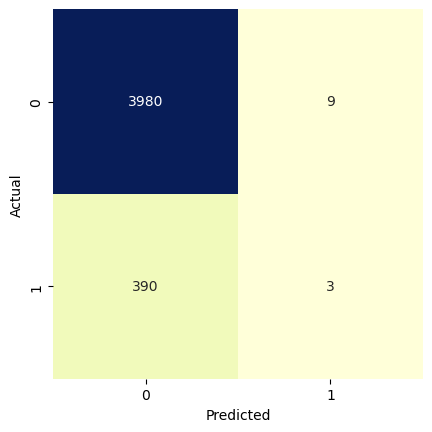

In [50]:
# Now, let's create the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred) 

sns.heatmap(cm, square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')

plt.xlabel('Predicted')
plt.ylabel('Actual')

In [51]:
from sklearn import metrics

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()

print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

True positives: 3
False positives: 9
True negatives: 3980
False negatives: 390



In [52]:
from sklearn. metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3989
           1       0.25      0.01      0.01       393

    accuracy                           0.91      4382
   macro avg       0.58      0.50      0.48      4382
weighted avg       0.85      0.91      0.87      4382



In [53]:
# Here we will retrieve the precision_score and recall_score metrics

from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, y_pred))
print("Overall Recall:",recall_score(y_test, y_pred))

Overall Precision: 0.25
Overall Recall: 0.007633587786259542


We have considered the predicitons from the model as being either 1 or 0 class labels.

In [54]:
y_scores = model.predict_proba(X_test)
print(y_scores[:10])

[[0.86082029 0.13917971]
 [0.92881896 0.07118104]
 [0.9240044  0.0759956 ]
 [0.91829513 0.08170487]
 [0.75076489 0.24923511]
 [0.88019851 0.11980149]
 [0.94480117 0.05519883]
 [0.92674172 0.07325828]
 [0.91672244 0.08327756]
 [0.88391746 0.11608254]]


The choice of labeling a prediction as 1 or 0 hinges on the selected probability threshold. Adjusting this threshold can influence predictions, leading to variations in the metrics found within the confusion matrix. A common practice in classifier evaluation involves analyzing both the recall (also known as the true positive rate) and the false positive rate across a range of thresholds. These rates are then plotted against various thresholds to create an ROC (Receiver Operating Characteristic) chart, as shown below:

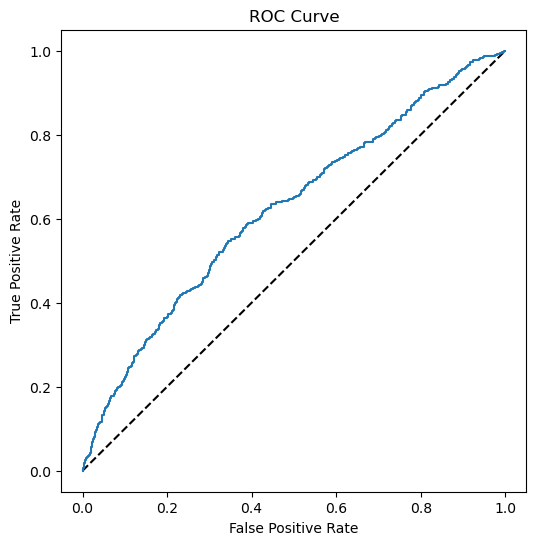

In [55]:
from sklearn.metrics import roc_curve

# Here we will calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# Before we plot ROC curve
fig = plt.figure(figsize=(6, 6))

# And then plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')

# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The ROC chart displays a line that shows how the true and false positive rates change for various threshold values ranging from 0 to 1. If a classifier were perfect, its curve would run straight up along the left side and continue straight across the top. In contrast, the diagonal line you see on the chart represents the probability of random, 50/50 guessing, so ideally, you'd want your curve to be above this line (or else your model isn't performing any better than random guessing).

We use the term "AUC" (Area Under the Curve), a value that falls between 0 and 1, to measure the overall performance of the model. The closer this value is to 1, the better your model is. Once again, scikit-learn offers a function to compute this metric.

In [56]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.6223788446216919


When we examine the true negatives, we discover that out of 3989 cases where there was no churn (churn = 0), we correctly predicted 3981 as not churning (hence, "True negative"). This is quite commendable!

Now, looking at the false negatives, this occurs when we predicted a client wouldn't churn (churn = 0), but they actually did (churn = 1). Unfortunately, this count is rather high at 390, and our aim is to minimize these false negatives.

Moving on to the false positives, this happens when we predicted a client would churn, but they didn't. In this case, there are only 8 such instances, which is quite positive.

Regarding the true positives, we were able to correctly identify just 3 out of the 393 clients who churned in the test dataset. This performance is somewhat lacking.

Now, considering the accuracy score, it may seem high, but it doesn't paint the complete picture. That's why precision and recall scores are crucial. In this scenario, we have a precision score of 0.27 and a recall score of 0.02, both of which are notably low. 

This indicates that this is not a particularly effective model.

<h3>Random Forest</h3>

In [64]:
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(n_estimators = 1000).fit(X_train, (y_train))
print (model_RF)

RandomForestClassifier(n_estimators=1000)


True positives: 22
False positives: 7
True negatives: 3982
False negatives: 371

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3989
           1       0.76      0.06      0.10       393

    accuracy                           0.91      4382
   macro avg       0.84      0.53      0.53      4382
weighted avg       0.90      0.91      0.88      4382

Accuracy: 0.9137380191693291
Overall Precision: 0.7586206896551724
Overall Recall: 0.05597964376590331

AUC: 0.6796658367763256


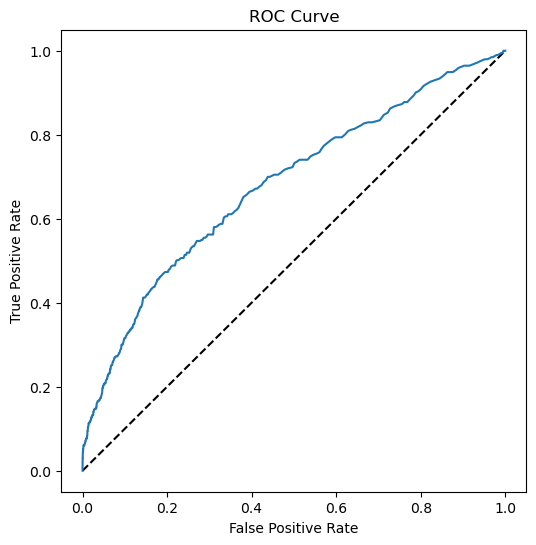

In [61]:
y_pred_RF = model_RF.predict(X_test)
y_scores_RF = model_RF.predict_proba(X_test)

tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred_RF).ravel()
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(classification_report(y_test, y_pred_RF))

print('Accuracy:', accuracy_score(y_test, y_pred_RF))
print("Overall Precision:",precision_score(y_test, y_pred_RF))
print("Overall Recall:",recall_score(y_test, y_pred_RF))
auc = roc_auc_score(y_test,y_scores_RF[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores_RF[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Examining the true negatives, we observe that out of 3989 cases, 3984 are correctly identified, which is excellent!

Now, considering the false negatives, having 371 is still relatively high, but it's an improvement over the Logistic Model.

As for false positives, we notice there are only a few, which is quite promising.

When we look at the true positives, correctly identifying 22 out of 393 cases is far from ideal.

Evaluating the accuracy score is somewhat misleading. The precision score and recall score reveal a rating of 0.81, which isn't bad but has room for improvement. However, the recall score indicates the classifier struggles to identify positive samples, making it a significant area for enhancement.

The AUC is a bit better when compared to Logistic Regression.

<h3>Understanding the Model</h3>

Feature importances signify the significance of a feature in the predictive model.

In [62]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': model_RF.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()


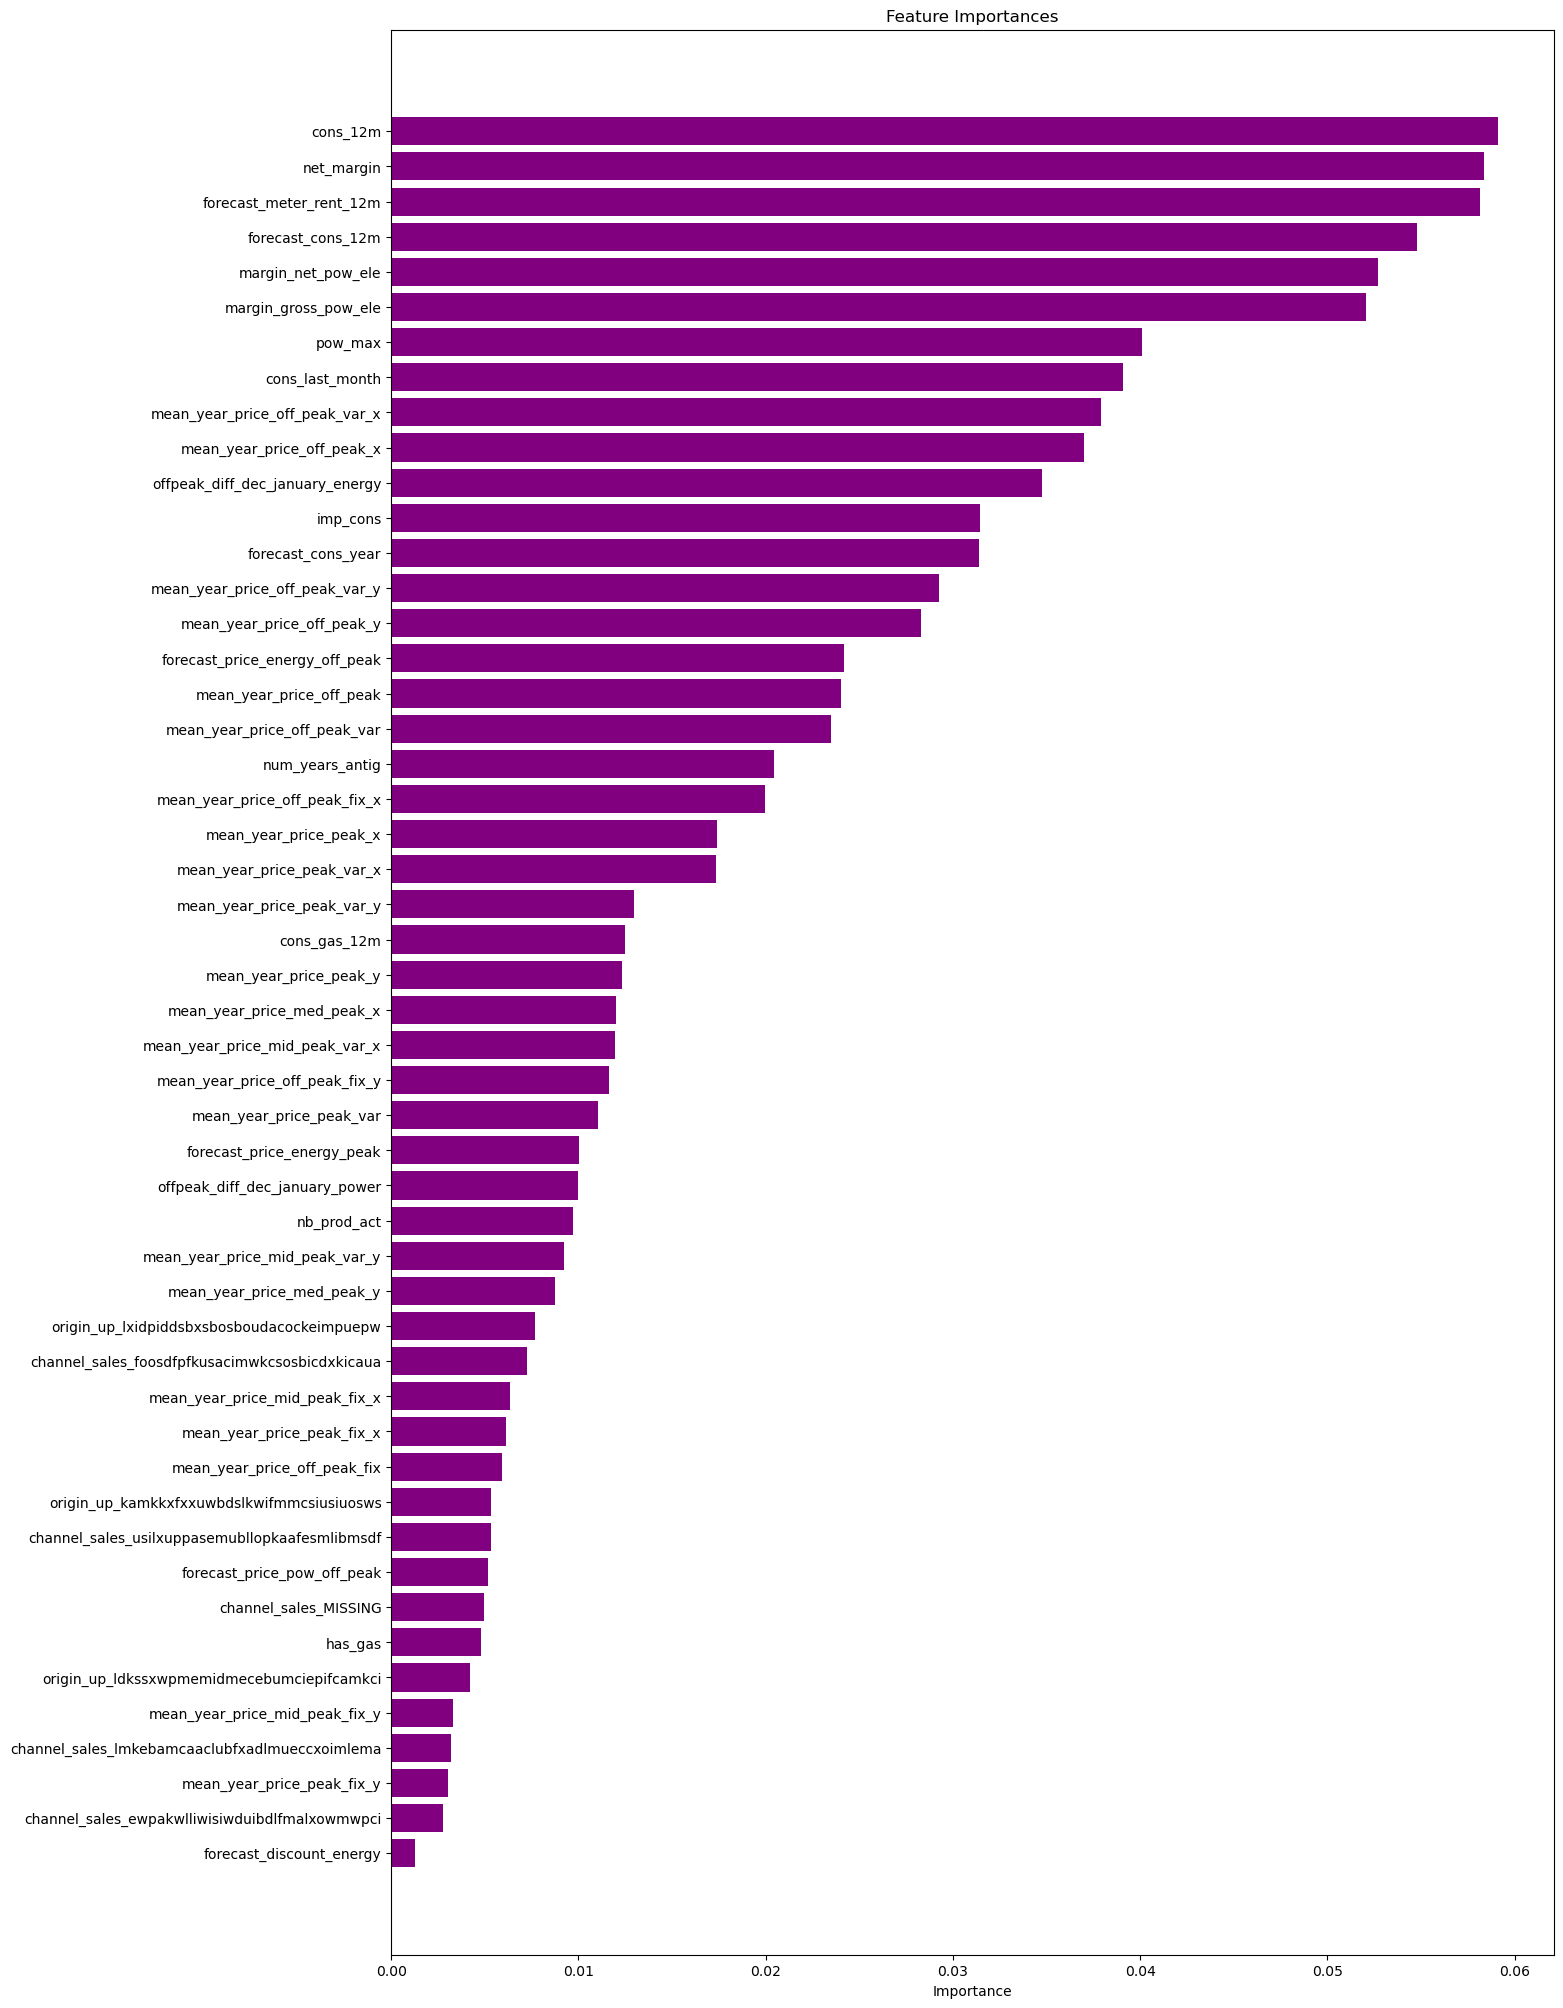

In [63]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='purple', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

Looking at this chart, we can notice the following:

- Consumption over 12 months and forecast meter rent for 12 months are significant factors leading to churn in this model.
- Net margin also plays a crucial role in the predictive model.
- The features related to price sensitivity are spread out, but they don't seem to be the primary reasons for a customer churning.

In [65]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [66]:
y_scores = model_RF.predict_proba(X_test)
probabilities = y_scores[:, 1]

In [67]:
X_test['churn'] = y_pred_RF.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('data_with_predictions.csv')

In [68]:
# It's important we save our trained model so we can use it again later.

import joblib

# Save the model as a pickle file

filename = 'powerco_churn_model.pkl'
joblib.dump(model_RF, filename)

['powerco_churn_model.pkl']